# Linear Regression
## Loading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = r'C:\Users\67585\Desktop\cs229 notes\Machine-Learning-master\Regression\ex0.txt'

In [87]:
def ReadFileAndFindXY(filename):
    
    def StrToFloat(List):
        try:
            newList = []
            for i in range(len(List)):
                item = float(List[i])
                newList.append(item)
        except: ValueError
        return newList
    
    newfile = []
    for line in open(filename,'r').readlines():
        line = line.replace('\t',',').replace('\n','').replace(',',' ')
        newfile.append(line)
    # define x and y vertor
    x = []
    y = []
    for i in range(len(newfile)):
        x.append(StrToFloat(pd.DataFrame(newfile)[0].str.split(' ')[i][:-1]))
        y.append(StrToFloat(pd.DataFrame(newfile)[0].str.split(' ')[i][-1]))
    
    
    
    x = np.matrix(x)
    
    y = np.matrix(y)

    return x,y







## Finding Parameters

In [226]:
# method 1: using formula just for linear regression : beta = (XTX)^(-1) * XT * y
def CalculateParamaters(x,y):
    '''
    Returns: paramater matrix (assume x.T * x is inverse matrix)
    Paramaters:x,y
    '''
    beta = (x.T * x).I * x.T * y
    return beta

x = ReadFileAndFindXY(path)[0]
y = ReadFileAndFindXY(path)[1]
paramaters = CalculateParamaters(x,y)

paramaters



matrix([[2.67699153],
        [1.388454  ]])

In [256]:
# method 2: gradient descent
def GradientDescent(beta_initial,alpha):
    '''
    Returns: beta (linear regression parameters type: matrix)
    Paramaters: beta_initial(type: matrix, (1,k), k is the length of x), alpha: learning rate(type:float)
    
    '''
    iteration_num = 0
    beta = beta_initial.astype('float64')
    i = 0
    while abs(x[i] * beta.T - y[i]) >= 0.001 and i < len(x):

        process = (x[i] * beta.T - y[i]) * x[i]
        process = np.matrix(process,dtype=np.float) * alpha
        beta -= process
        i += 1

    return beta.T,i

beta_initial = np.matrix([0,0])

GradientDescent(beta_initial,0.5)

(matrix([[2.66847587],
         [1.45129348]]), 86)

In [ ]:
# method 3: Newton's method
# do not know how to express differential, improve later
def NewtonMethod():
    pass

## Data Visualization

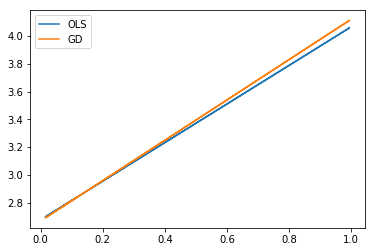

In [266]:
x = ReadFileAndFindXY(path)[0]
y = ReadFileAndFindXY(path)[1]
# OLS (according to formula)
xaxis1 = np.array(x.T[1].T)
yaxis1 = np.array(x * CalculateParamaters(x,y))
# GD with 0.5 alpha
beta_initial = np.matrix([0,0])
xaxis2 = np.array(x.T[1].T)
yaxis2 = np.array(x * GradientDescent(beta_initial,0.5)[0])

plt.plot(xaxis1,yaxis1)
plt.plot(xaxis2,yaxis2)
plt.legend(['OLS','GD'])
plt.show()